# I. Knots and Smoothing
***

## What is a knot?

A knot is a closed loop in 3-space

![alt text](https://upload.wikimedia.org/wikipedia/commons/f/fc/Trefoil_Knot.gif "Trefoil knot 3D")

## A Knot diagram

...is a projection of a knot onto a plane

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Trefoil_knot_left.svg/250px-Trefoil_knot_left.svg.png "Trefoil knot projection")

## Shadow of a knot

A shadow is a projection of a given knot that shows no crossing information 

![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/trefoil.png?raw=true "Trefoil shadow")

## Smoothing

To smooth a crossng is to replace a crossing in a shadow by one of the two ways shown below: 
![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/smoothing.JPG?raw=true "Smoothing a crossing")<insert smoothing a crossing photo>

# II. Discrete Distribution
***

## Smoothing Process for a trefoil

For a shadow of a knot with $3$ crossings, there are $2^3=8$ outcomes of the smoothing process ranging from $1$ component to $3$ components. (In general, for an $n$ crossing knot, there are $2^n$ outcomes). Below are the outcomes for different ways of smoothing a shadow of a trefoil.

<img src="https://github.com/allenjstewart/Shadow_Distributions/blob/master/outcomes.png?raw=true" width="750" height="650" />



We can create a histogram of the outcomes of the smoothing process. 

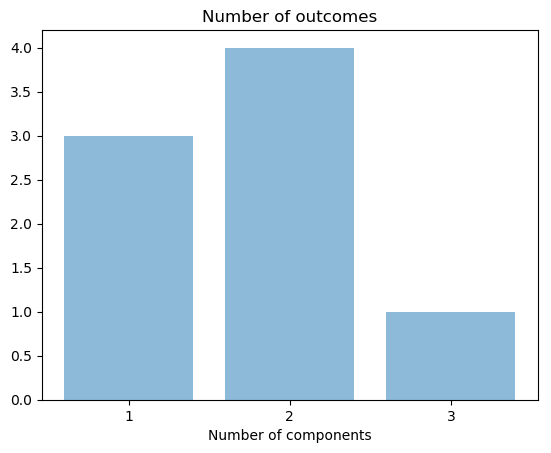

In [135]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
outcomes = ('1', '2', '3')
y_pos = np.arange(len(outcomes))
dist = [3,4,1]
 
plt.bar(y_pos, dist, align='center', alpha=0.5)
plt.xticks(y_pos, outcomes)
plt.xlabel('Number of components')
plt.title('Number of outcomes')
 
plt.show()

If we divide by $8$ we get the probability of winding up with $x$ components.

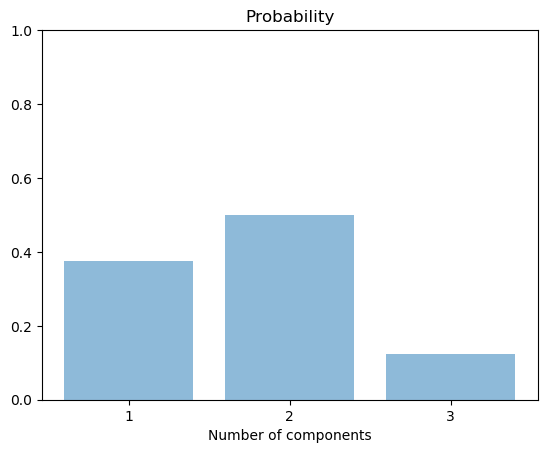

In [136]:
outcomes = ('1', '2', '3')
y_pos = np.arange(len(outcomes))
dist = [3/8,4/8,1/8]
 
plt.bar(y_pos, dist, align='center', alpha=0.5)
plt.xticks(y_pos, outcomes)
plt.xlabel('Number of components')
plt.title('Probability')
plt.ylim(ymax=1)
 
plt.show()

### Goal: Find the probabilities for the union of $n$ shadows

## What is a union?

A union is created from a number of shadows where the shadows have no intersections. Below is the union of two shadows. 

![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/union.png?raw=true "Union of two trefoils")


Using just the histogram of one trefoil, we can find the histogram of the union of $n$ trefoils.

Distribution for 4 knots
[0.0, 0.0, 0.0, 81.0, 432.0, 972.0, 1200.0, 886.0, 400.0, 108.0, 16.0, 1.0]
Mean for discrete distribution of 4 knots: 7.0.


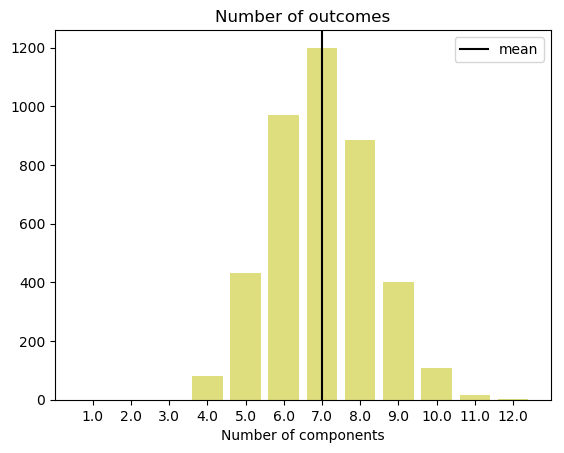

In [174]:
# -*- coding: utf-8 -*-
import numpy as np

iniDist = np.array([3,4,1])
nCrossings= 3
nKnots = 4
prevKnots = iniDist
bigKnots = iniDist

for a in range(0, nKnots):
    if a == 1:
        bigKnots = iniDist
    elif a > 1:
        prevKnots = bigKnots
    
    bigKnots = np.concatenate((np.zeros(len(prevKnots)),np.zeros(len(iniDist))),axis=0)
    for k in range(0,nKnots*len(iniDist)):
        for n in range(0,len(prevKnots)):
            for m in range(0,len(iniDist)):
                if n + m == k:
                    bigKnots[k+1] = bigKnots[k+1] + prevKnots[n]*iniDist[m]

print('Distribution for ' + repr(nKnots) + ' knots')
print(list(bigKnots))



outcomes = np.zeros(nKnots*nCrossings)
for i in range(0,nKnots*nCrossings):
    outcomes[i] = i+1
    
y_pos = np.arange(len(outcomes))
dist = list(bigKnots)


# Mean (Expected Outcome)    
total = np.sum(bigKnots)    
mean = np.dot(outcomes,bigKnots)/total
print('Mean for discrete distribution of ' + repr(nKnots) + ' knots: ' + repr(mean) +'.')


 
plt.bar(y_pos, dist, align='center', alpha=0.5, color='y')
plt.axvline(x = mean - 1, color='0')            #-1 because indexing
plt.legend(['mean'])
plt.xticks(y_pos, outcomes)
plt.xlabel('Number of components')
plt.title('Number of outcomes')
 
plt.show()

### Bigger goal: Find the distribution for the union of $n$ knots for any given knot

For this, we must know the distribution of a single knot. For the trefoil, brute force was easy enough but for more complicated knots.....MAYBE HOPEFULLY....we have some mathematica code which allows us to find the distribution of a single knot

# V. Are there other ways of getting these disributions? 
***


## Multinomial Distribution

Yes! The multinomial distribution is one which we assign our probabilities as the coefficients of terms in a multinomial. For our problem, we can then raise this multinomial to the number of knots. The coefficients then tell us the number of outcomes for a certain number of components.

#### Example
Recall that the probabilities for a trefoil knot were $1,2,$ and $3$ components for probabilities of $\frac{3}{8},\frac{4}{8},$ and $\frac{1}{8}$ respectively. 

If we let $x_i$ represent $i$ components, we get the multinomial $\frac{3}{8}x_1 + \frac{4}{8}x_2 + \frac{1}{8}x_3$. 
Then $(\frac{3}{8}x_1 + \frac{4}{8}x_2 + \frac{1}{8}x_3)^n = yadayada$ and we can add up the indices to help sort the coefficients for ending up with $x_i$ components. For example, $x_2 x_2 = x_1 x_3=x_4$ since $2+2=1+3=4$. 

When we analyze the resulting multinomial this way, we get the multinomial $\frac{0}{64}x_1+\frac{9}{64}x_2+\frac{24}{64}x_3+\frac{22}{64}x_4+\frac{8}{64}x_5+\frac{1}{64}x_6$. This method of getting the probability distribution has a longer running time on mathematica but it is a good way to check our code. 

# IV. Connected Sums
***

## What is composition?

A composition of diagrams can be created from multiple shadows by removing a small arc from each, then connecting the four endpoints by two new arcs.

![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/composition.png?raw=true "Composition of two trefoils")

## What is a connected sum?

A connected sum is the composition of multiple shadows. 

![alt text](https://github.com/allenjstewart/Shadow_Distributions/blob/master/composition_multiple_trefoils.JPG?raw=true "Linear composition of multiple shadows")

# VI. Theorems & Conjectures

***

## Theorem/Definition (Hopefully). We say that $D_1 \leq D_2$ if each for each coefficient $p$ in the respective monomial distribution, it is true that $p_1 \leq p_2$. 


## Conjecture. The minimal distribution for a shadow of any given knot is an invariant.  

# VII. A look ahead
***

## Connected Sum Graphs

## Finding Distributions for any given knot <adjacency matrix etc>

##

# The End
***


# VII.        Knot the end....also knot an invariant
***

TypeError: unsupported operand type(s) for ^: 'numpy.float64' and 'int'